##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```.

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```.



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

### Zbiór SCORES.csv

In [587]:
# 1. Zaimportowanie niezbędnych bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [588]:
# 2. Odczytanie danych z pliku

Scores = pd.read_csv('SCORES.csv')
Scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


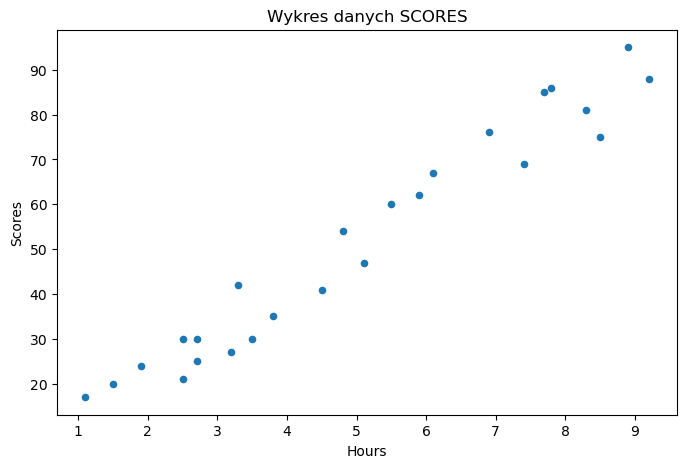

In [589]:
# 3. Wstępna wizualizacja danych

fig, ax = plt.subplots(figsize=(8, 5))
Scores.plot.scatter(ax = ax, x = 'Hours', y='Scores')
plt.title('Wykres danych SCORES')
plt.show()

In [590]:
# 4. Podział na dane zależne, dane niezależne, zbiory testowe oraz treningowe

x = Scores[['Hours']]
y = Scores[['Scores']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=0)

In [591]:
%%capture
# 5. Utworzenie modelu regresji liniowej

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

In [592]:
# 6. Wypisanie wskaźników coeff_ oraz intercept_

coef = regr.coef_
print('Współczynniki regresji liniowej: ',coef)
intercept = regr.intercept_
print('Wartość wyrazu wolnego: ', intercept)

Współczynniki regresji liniowej:  [[9.8479817]]
Wartość wyrazu wolnego:  [1.09792635]


Wartość zwracana przez metodę coef_ to wartość estymowanego współczynnika kierunkowego problemu regresji liniowej dla danych treningowych. Jeśli dane spełniają wiele dopasowań, wówczas tablica będzie zawierała współczynniki dla każdego z nich. Z kolei wartości zwracane przez metodę intercept_ to wartość wyrazu wolnego dla danych treningowych.

In [593]:
# 7. Dokonanie predykcji dla części testowej i porównanie jej z posiadanymi danymi

y_pred = regr.predict(X_test)
Df = pd.DataFrame({'Wynik predykcji': y_pred.squeeze(),
                   'Właściwe dane': y_test.to_numpy().squeeze(),
                   'Moduł z różnicy': np.abs(y_pred - y_test.to_numpy()).squeeze()})
Df

,Wynik predykcji,Właściwe dane,Moduł z różnicy
0,15.869899,20,4.130101
1,32.611468,27,5.611468
2,73.972991,69,4.972991
3,25.717881,30,4.282119
4,59.201018,62,2.798982
5,38.520257,35,3.520257
6,19.809092,24,4.190908
7,77.912184,86,8.087816
8,69.049000,76,6.951000
9,11.930706,17,5.069294


Jak widać, dane predykcji całkiem dobrze estymują dane testowe, z największym odchyleniem na poziomie ośmiu. Prawdopodobnie lepszą predykcję uzyskano by gdyby zbiór treningowy był większy niż jedynie 30% oryginalnych danych.

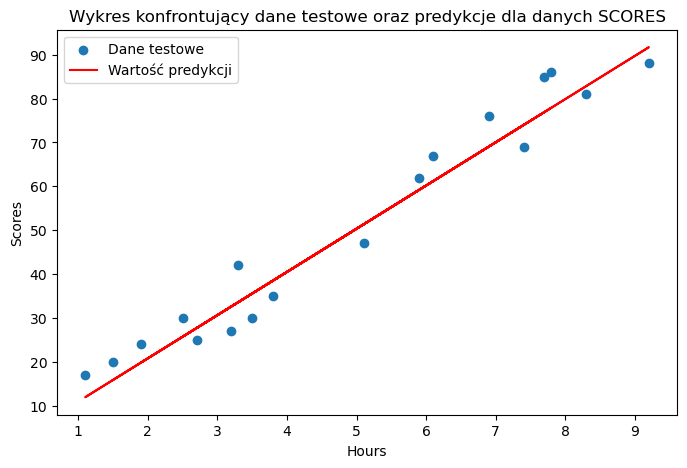

In [594]:
# 8. Wykonanie wykresu konfrontującego dane testowe z ich predykcjami na podstawie regresji liniowej

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(X_test, y_test.to_numpy())
plt.plot(X_test, y_pred, 'r')
ax.set_xlabel('Hours')
ax.set_ylabel('Scores')
ax.set_title('Wykres konfrontujący dane testowe oraz predykcje dla danych SCORES')
ax.legend(['Dane testowe', 'Wartość predykcji'])
plt.show()

In [595]:
# 9. Dokonanie walidacji uzyskanych predykcji wykorzystując trzy różne metryki

mae = mean_absolute_error(y_test.to_numpy().squeeze(), y_pred.squeeze())
mse = mean_squared_error(y_test.to_numpy().squeeze(), y_pred.squeeze())
sqrmse = np.sqrt(mse)

Df = pd.DataFrame({'Średni błąd bezwzględny': mae,
                   'Błąd średniokwadratowy': mse,
                   'Pierwiastek błędu średniokwadratowego': sqrmse}, index=[0])
Df

,Średni błąd bezwzględny,Błąd średniokwadratowy,Pierwiastek błędu średniokwadratowego
0,5.001787,28.47475,5.336174


### Zbiór SBP.csv

In [596]:
# 2. Odczytanie danych z pliku

Sbp = pd.read_csv('SBP.csv')
Sbp

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132
5,68,130
6,66,127
7,77,163
8,63,136
9,54,115


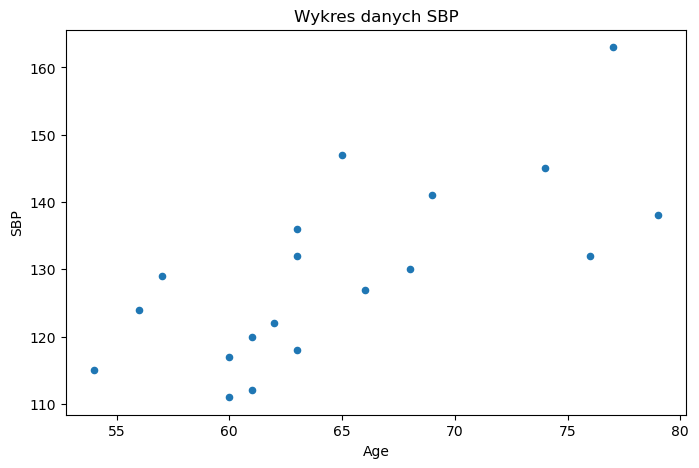

In [597]:
# 3. Wstępna wizualizacja danych

fig, ax = plt.subplots(figsize=(8, 5))
Sbp.plot.scatter(ax = ax, x = 'Age', y='SBP')
plt.title('Wykres danych SBP')
plt.show()

In [598]:
# 4. Podział na dane zależne, dane niezależne, zbiory testowe oraz treningowe

x = Sbp[['Age']]
y = Sbp[['SBP']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=0)

In [599]:
%%capture
# 5. Utworzenie modelu regresji liniowej

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

In [600]:
# 6. Wypisanie wskaźników coeff_ oraz intercept_

coef = regr.coef_
print('Współczynniki regresji liniowej: ',coef)
intercept = regr.intercept_
print('Wartość wyrazu wolnego: ', intercept)

Współczynniki regresji liniowej:  [[0.79344729]]
Wartość wyrazu wolnego:  [72.71509972]


In [601]:
# 7. Dokonanie predykcji dla części testowej i porównanie jej z posiadanymi danymi

y_pred = regr.predict(X_test)
Df = pd.DataFrame({'Wynik predykcji': y_pred.squeeze(),
                   'Właściwe dane': y_test.to_numpy().squeeze(),
                   'Moduł z różnicy': np.abs(y_pred - y_test.to_numpy()).squeeze()})
Df

,Wynik predykcji,Właściwe dane,Moduł z różnicy
0,122.702279,118,4.702279
1,121.115385,120,1.115385
2,122.702279,136,13.297721
3,121.908832,122,0.091168
4,124.289174,147,22.710826
5,127.462963,141,13.537037
6,125.082621,127,1.917379
7,122.702279,132,9.297721
8,131.430199,145,13.569801
9,126.669516,130,3.330484


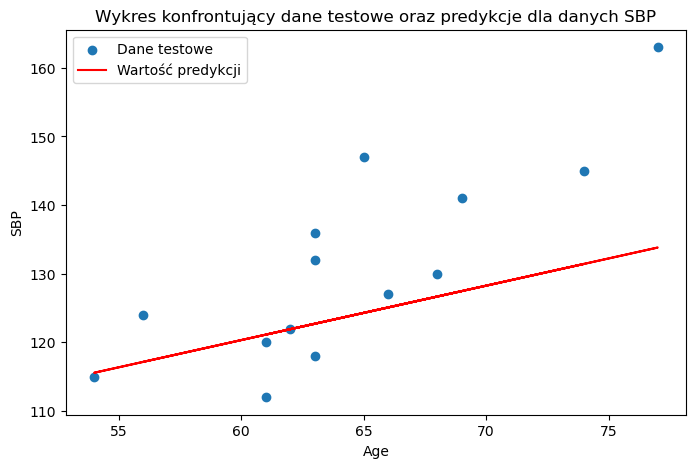

In [602]:
# 8. Wykonanie wykresu konfrontującego dane testowe z ich predykcjami na podstawie regresji liniowej

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(X_test, y_test.to_numpy())
plt.plot(X_test, y_pred, 'r')
ax.set_xlabel('Age')
ax.set_ylabel('SBP')
ax.set_title('Wykres konfrontujący dane testowe oraz predykcje dla danych SBP')
ax.legend(['Dane testowe', 'Wartość predykcji'])
plt.show()

In [603]:
# 9. Dokonanie walidacji uzyskanych predykcji wykorzystując trzy różne metryki

mae = mean_absolute_error(y_test.to_numpy().squeeze(), y_pred.squeeze())
mse = mean_squared_error(y_test.to_numpy().squeeze(), y_pred.squeeze())
sqrmse = np.sqrt(mse)

Df = pd.DataFrame({'Średni błąd bezwzględny': mae,
                   'Błąd średniokwadratowy': mse,
                   'Pierwiastek błędu średniokwadratowego': sqrmse}, index=[0])
Df

,Średni błąd bezwzględny,Błąd średniokwadratowy,Pierwiastek błędu średniokwadratowego
0,9.234839,154.782813,12.441174


Porównując regresję liniową danych SCORES z danymi SBP uzyskaną za pomocą zbioru treningowego w ilości 30% zbioru oryginalnego widać, że uzyskana predykcja jest zdecydowanie lepsza dla pierwszego z nich. Pierwszą przyczyną takiego stanu jest zdecydowanie większy rozrzut danych SBP w stosunku do danych SCORES, co przekłada się bezpośrednio na mniej dokładne przybliżenie danych przez model. Drugim powodem może być w tym przypadku również zbyt mały zbiór treningowy, jak i pechowe jego wylosowanie bowiem dla małej ilości danych każda z nich ma znacznie większy wpływ na końcowy kształt modelu niż dla dużych zbiorów. Dla zastosowanego innego parametru random_state funkcji train_test_split niż obecnie uzyskiwano lepsze modele.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [604]:
# 2. Odczytanie danych z pliku

Petrol = pd.read_csv('PETROL.csv')
Petrol

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


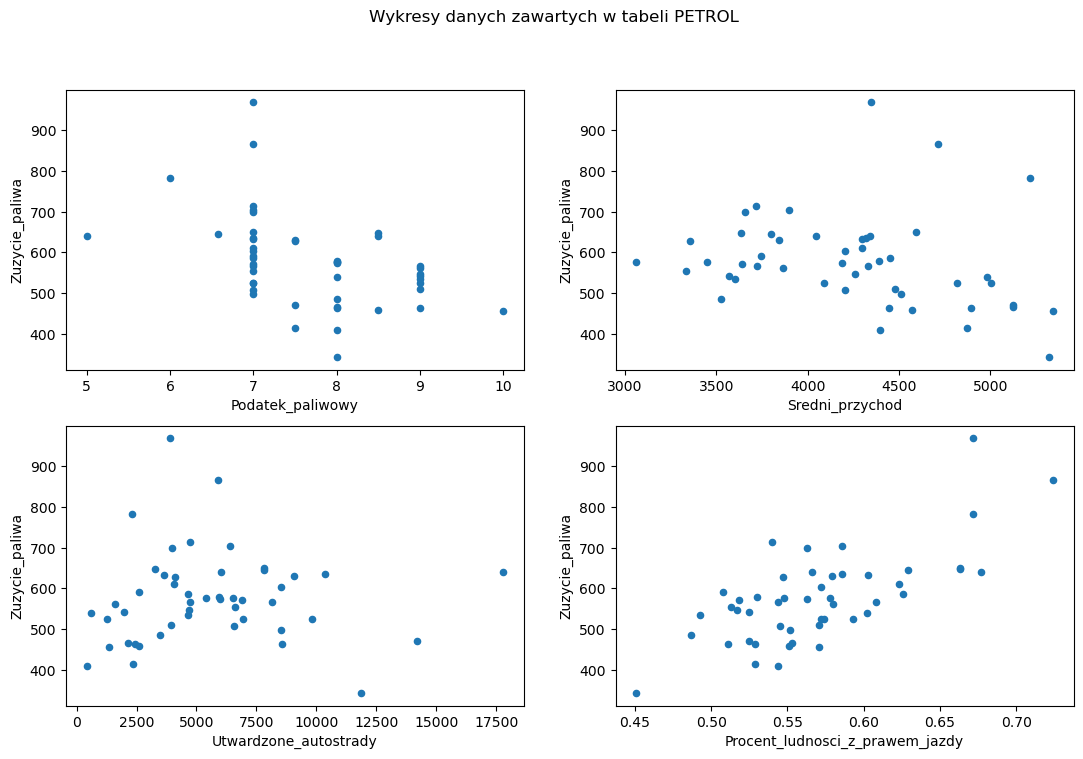

In [605]:
# 3. Wstępna wizualizacja danych

fig, ax = plt.subplots(2, 2, figsize=(13, 8))
tab = ['Podatek_paliwowy','Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy']
k = 0
for i in [0, 1]:
    for j in [0, 1]:
        Petrol.plot.scatter(ax = ax[i][j], x = tab[k], y='Zuzycie_paliwa')
        k+= 1
fig.suptitle('Wykresy danych zawartych w tabeli PETROL')
plt.show()

In [606]:
# 4. Podział na dane zależne, dane niezależne, zbiory testowe oraz treningowe

x = Petrol.drop('Zuzycie_paliwa',axis=1)
y = Petrol[['Zuzycie_paliwa']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=0)

In [607]:
%%capture
# 5. Utworzenie modelu regresji liniowej

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

In [608]:
# 6. Wypisanie wskaźników coeff_ oraz intercept_

coef = regr.coef_
print('Współczynniki regresji liniowej: ',coef)
intercept = regr.intercept_
print('Wartość wyrazu wolnego: ', intercept)

Współczynniki regresji liniowej:  [[-4.25828099e+01 -9.64961393e-02 -3.99171321e-03  1.64357272e+03]]
Wartość wyrazu wolnego:  [416.46906213]


Tym razem tablica coef_ zwraca współczynnik beta dla każdej serii danych użytej do regresjii liniowej.

In [609]:
# 7. Dokonanie predykcji dla części testowej i porównanie jej z posiadanymi danymi

y_pred = regr.predict(X_test)
Df = pd.DataFrame({'Wynik predykcji': y_pred.squeeze(),
                   'Właściwe dane': y_test.to_numpy().squeeze(),
                   'Moduł z różnicy': np.abs(y_pred - y_test.to_numpy()).squeeze()})
Df

,Wynik predykcji,Właściwe dane,Moduł z różnicy
0,477.461059,534,56.538941
1,543.703196,410,133.703196
2,622.214484,577,45.214484
3,590.951333,571,19.951333
4,704.182002,577,127.182002
5,679.990461,704,24.009539
6,521.837079,487,34.837079
7,699.437032,587,112.437032
8,481.528803,467,14.528803
9,499.478791,580,80.521209


Jak widać, w niektórych przypadkach różnice pomiędzy danymi a ich estymacją za pomocą modelu liniowego jest duża i wynosi nawet około 1/6 wartości.

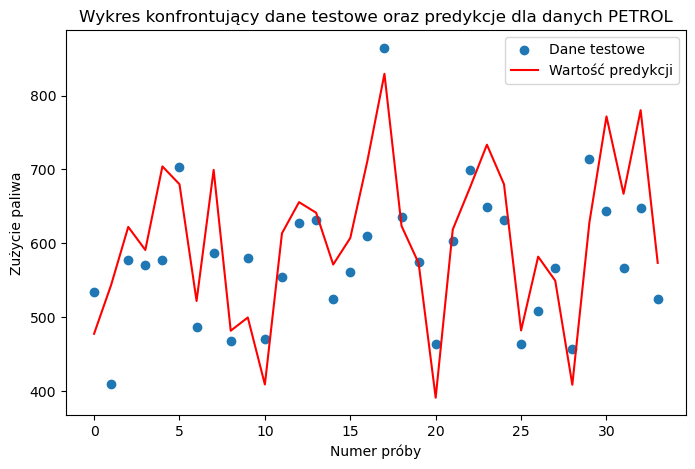

In [610]:
# 8. Wykonanie wykresu konfrontującego dane testowe z ich predykcjami na podstawie regresji liniowej

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(range(len(X_test)), y_test.to_numpy())
plt.plot(range(len(X_test)), y_pred, 'r')
ax.set_xlabel('Numer próby')
ax.set_ylabel('Zużycie paliwa')
ax.set_title('Wykres konfrontujący dane testowe oraz predykcje dla danych PETROL')
ax.legend(['Dane testowe', 'Wartość predykcji'])
plt.show()

In [611]:
# 9. Dokonanie walidacji uzyskanych predykcji wykorzystując trzy różne metryki

mae = mean_absolute_error(y_test.to_numpy().squeeze(), y_pred.squeeze())
mse = mean_squared_error(y_test.to_numpy().squeeze(), y_pred.squeeze())
sqrmse = np.sqrt(mse)

Df = pd.DataFrame({'Średni błąd bezwzględny': mae,
                   'Błąd średniokwadratowy': mse,
                   'Pierwiastek błędu średniokwadratowego': sqrmse}, index=[0])
Df

,Średni błąd bezwzględny,Błąd średniokwadratowy,Pierwiastek błędu średniokwadratowego
0,57.378077,4798.872015,69.273891


Jak widać, uzyskany model liniowy przeciętnie odwzorowuje dane końcowe. Średni błąd bezwzględny jest na poziomie 60, co stanowi dosyć sporą wartość. Pierwszą przyczyną, dla której model jest nie najlepszy, może być ponownie mały zbiór treningowy dla danych, co przekłada się na mniejszą dokładność modelu. Kolejnym problemem w tym przypadku może również być mała korelacja pomiędzy predyktorami a zmienną zależną.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*).

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy.

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [612]:
#1. Zaimportowanie niezbędnych bibliotek

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [613]:
# 2. Odczytanie danych z pliku

Heart = pd.read_csv('HEART.csv')
Heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [614]:
# 3. Przetworzenie danych

Heart = Heart.replace('?', float('nan'))
Heart = Heart.drop(columns=['slope', 'ca', 'thal'])
Heart = Heart.dropna(axis=0)
Heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [615]:
# 4. Zakodowanie niezależnych zmiennych kategorialnych

Heart = pd.get_dummies(Heart, columns = ['restecg','cp'])
Heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4
0,28,1,130,132,0,185,0,0.0,0,0,0,1,0,1,0,0
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,0,1,0,1,0,0,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,1,0,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,1,0,0,0,0,0,1
290,54,0,130,294,0,100,1,0.0,1,0,1,0,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,1,0,0,0,0,0,1
292,58,0,180,393,0,110,1,1.0,1,1,0,0,0,1,0,0


In [616]:
# 5. Podział na dane zależne i niezależne oraz zbiory treningowe i testowe

# Jako zmienną zależną wybieram num, czyli diagnozę serca wystawioną na podstawie pozostałych serii danych zawierających informację o pacjencie.
x = Heart.drop(columns=['num       '])
y = Heart[['num       ']]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=0)

In [617]:
%%capture
# 6. Utworzenie modelu regresji logistycznej

regr = LogisticRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [618]:
# 7. Wyświetlenie i ocena wyników za pomocą dwóch metryk

Df = pd.DataFrame({'Wynik predykcji': y_pred.squeeze(),
                   'Właściwe dane': y_test.to_numpy().squeeze(),
                   'Czy wartość predykcji jest równa wartości oryginalnej': np.logical_and(y_pred.squeeze(), y_test.to_numpy().squeeze())})
Df

,Wynik predykcji,Właściwe dane,Czy wartość predykcji jest równa wartości oryginalnej
0,0,1,False
1,0,0,False
2,1,1,True
3,0,0,False
4,1,1,True
...,...,...,...
204,1,1,True
205,1,1,True
206,0,0,False
207,1,1,True


In [619]:
regr.score(X_test, y_test)

0.8277511961722488

In [620]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       137
           1       0.75      0.75      0.75        72

    accuracy                           0.83       209
   macro avg       0.81      0.81      0.81       209
weighted avg       0.83      0.83      0.83       209



In [621]:
# 8. Wyskalowanie danych i ponowne przeprowadzenie powyższych operacji

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [622]:
%%capture
regr = LogisticRegression()
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)

In [623]:
Df = pd.DataFrame({'Wynik predykcji': y_pred.squeeze(),
                   'Właściwe dane': y_test.to_numpy().squeeze(),
                   'Czy wartość predykcji jest równa wartości oryginalnej': np.logical_and(y_pred.squeeze(), y_test.to_numpy().squeeze())})
Df

,Wynik predykcji,Właściwe dane,Czy wartość predykcji jest równa wartości oryginalnej
0,0,1,False
1,0,0,False
2,1,1,True
3,0,0,False
4,1,1,True
...,...,...,...
204,1,1,True
205,1,1,True
206,0,0,False
207,1,1,True


In [624]:
regr.score(X_test_scaled, y_test)

0.8133971291866029

In [625]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       137
           1       0.74      0.71      0.72        72

    accuracy                           0.81       209
   macro avg       0.79      0.79      0.79       209
weighted avg       0.81      0.81      0.81       209



Jak widać, model uzyskuje dobre wyniki na poziomie 80% dokładności. Można jednak zauważyć, że przeskalowanie danych zależnych nie poprawiło dokładności, a wręcz pogorszyło go o około 1.5%.